In [1]:
%%bash
# The following line ensures that cell runs only in Google Colab
!(stat -t /usr/local/lib/*/dist-packages/google/colab > /dev/null 2>&1) && exit 
echo "You are running in colab, getting data"
wget -q https://github.com/paulyurlov/DataVisualization/archive/main.zip
unzip -qq main.zip DataVisualization-main/Data/*
rm -rf Data/ main.zip
cp -r DataVisualization-main/Data/. Data/
rm -rf DataVisualization-main/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import date


def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))


plt.style.use("ggplot")

# Часть 1

In [3]:
df = pd.read_csv('Data/prog_workers.csv')
df.drop_duplicates(inplace=True)
df

,Firstname,Lastname,Country,Date,Decimal number,Experience,Prog_Language
0,Jolyn,Elsinore,Brazil,16-01-1981,8672.38,3,Basic
1,Candi,Fax,Norfolk Island,21-03-1998,15095.28,5,C#
2,Jessy,Gillan,Central African Republic,02-10-1985,28243.89,2,С++
3,Benita,Tice,French Southern Territories,17-08-1975,24273.18,1,С++
4,Arlina,Peonir,Canada,25-12-1993,26938.66,3,PHP
...,...,...,...,...,...,...,...
1495,Gloria,Sheng,Mongolia,15-05-1999,16805.69,2,C#
1496,Kimberley,Maxi,Argentina,06-02-1982,15323.02,5,Assembler
1497,Roxane,Shirberg,Hong Kong,20-01-1980,7010.41,1,Assembler
1498,Nickie,Ahab,Iceland,03-08-1970,12453.41,5,Java


/tmp/ipykernel_28908/2060594818.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0][2].set_xticklabels(ax[0][1].get_xticklabels(), rotation=40)


<AxesSubplot:title={'center':'Диграмма рассеяния по возрасту работников и заработной плате'}, xlabel='Decimal number', ylabel='age'>

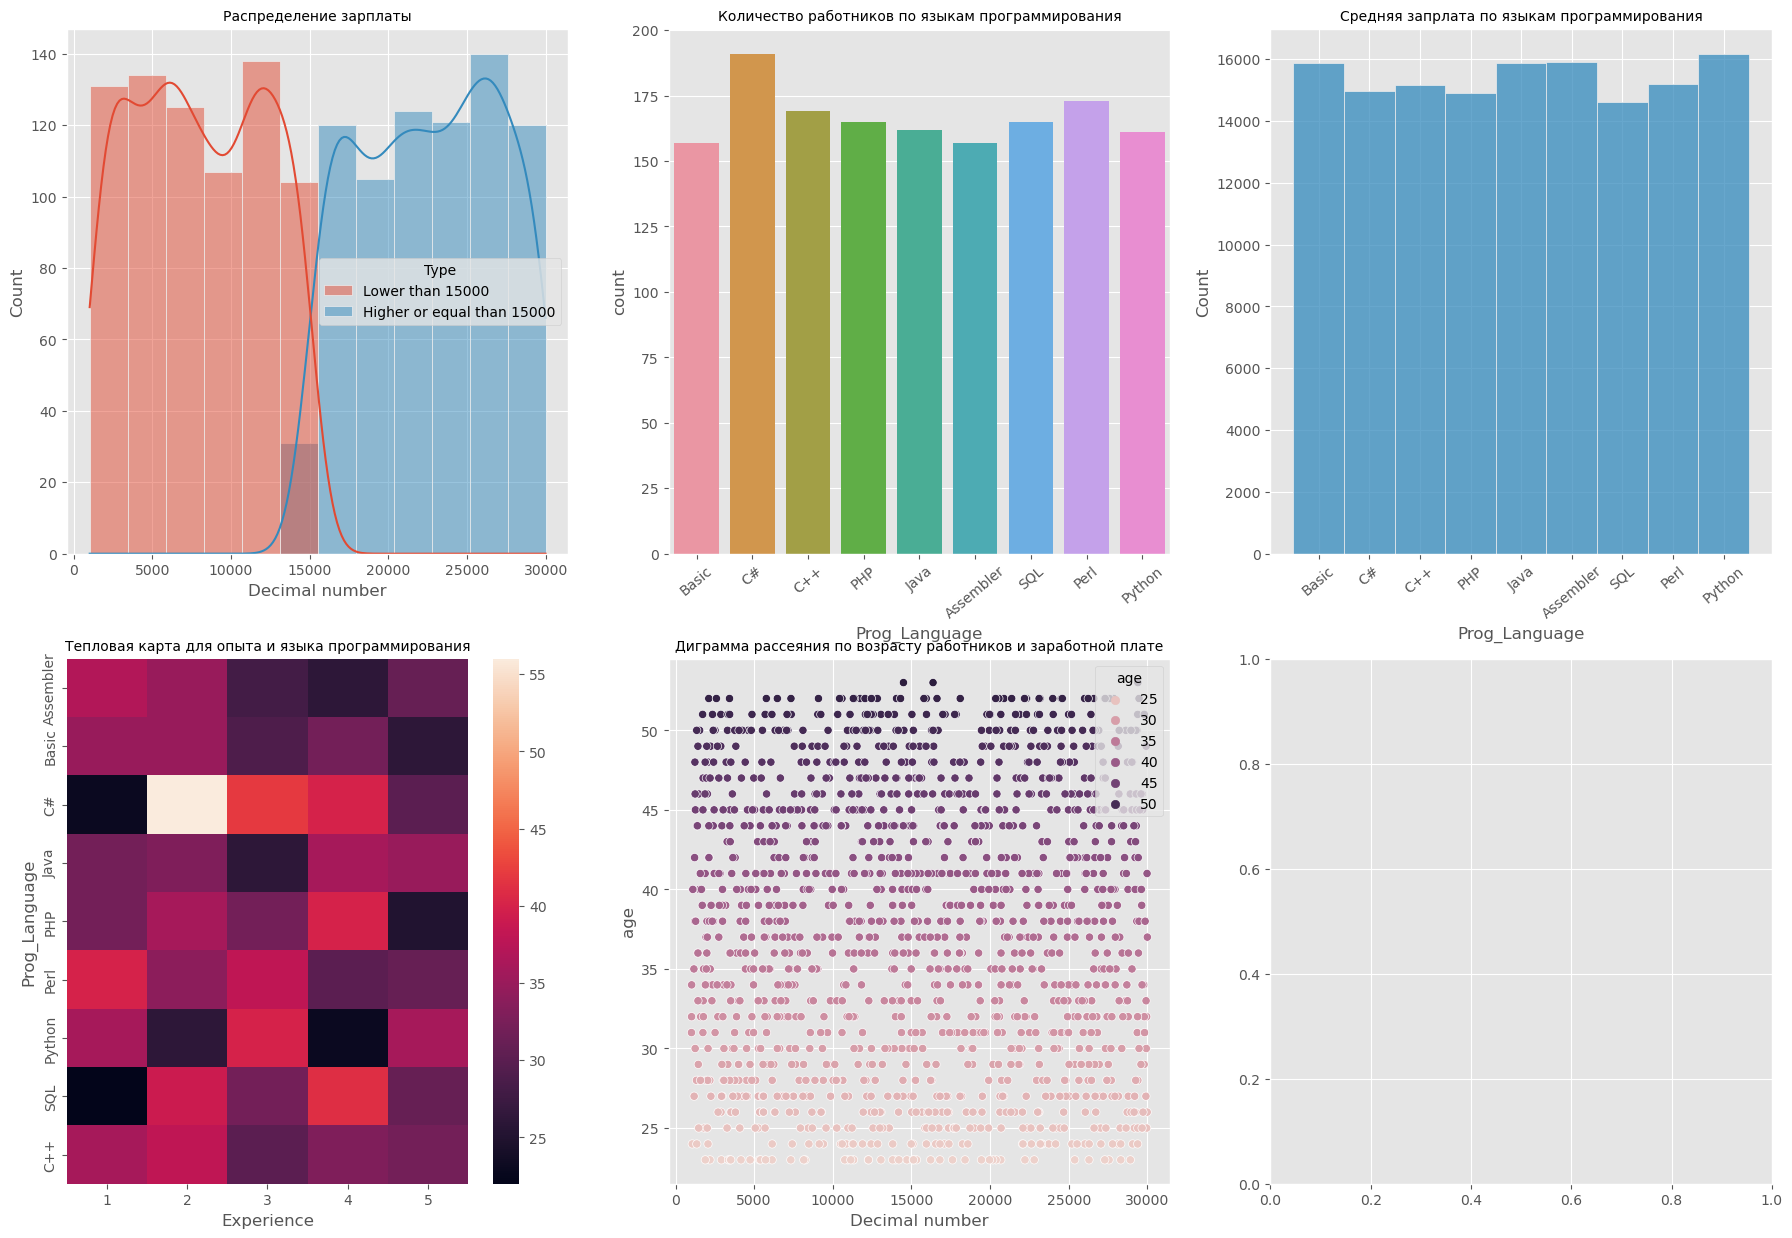

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(22, 15))

df['Type'] = 'Lower than 15000'
df.loc[df['Decimal number'] >= 15000, 'Type'] = 'Higher or equal than 15000'
ax[0][0].set_title('Распределение зарплаты', fontsize=10)
sns.histplot(data=df, x='Decimal number', hue='Type', ax=ax[0][0], kde=True)

ax[0][1].set_title('Количество работников по языкам программирования', fontsize=10)
sns.countplot(data=df, x='Prog_Language', ax=ax[0][1])
ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(), rotation=40)

tmp = df.groupby(by=['Prog_Language']).mean()
tmp.reset_index()
ax[0][2].set_title('Средняя запрлата по языкам программирования', fontsize=10)
sns.histplot(data=tmp, x='Prog_Language', weights=tmp['Decimal number'], ax=ax[0][2])
ax[0][2].set_xticklabels(ax[0][1].get_xticklabels(), rotation=40)

tmp = df.groupby(['Prog_Language', 'Experience']).count().reset_index().pivot(index='Prog_Language', columns='Experience', values='Decimal number')
ax[1][0].set_title('Тепловая карта для опыта и языка программирования', fontsize=10)
sns.heatmap(data=tmp, ax=ax[1][0])

ax[1][1].set_title('Диграмма рассеяния по возрасту работников и заработной плате', fontsize=10)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['age'] = df['Date'].apply(calculate_age) 
sns.scatterplot(data=df, x='Decimal number', y='age', hue='age', ax=ax[1][1])





# Часть 2

In [5]:
df = pd.read_csv('Data/Visa_countries.csv', encoding='cp1251')
df

,№,Перечень стран,Режим въезда с дипломатическим паспортом,Режим въезда со служебным паспортом,Режим въезда с общегражданским паспортом
0,1,Абхазия,Безвизовый (до 90 дней),Безвизовый (до 90 дней),Безвизовый (до 90 дней)
1,2,Австралия,Визовый,Визовый,Визовый
2,3,Австрия,Безвизовый (до 90 дней в течение 180 дней),Визовый,Визовый
3,4,Азербайджан,Безвизовый,Безвизовый,Безвизовый
4,5,Албания,Безвизовый (до 90 дней),Безвизовый (до 90 дней),Визовый
...,...,...,...,...,...
191,192,ЮАР,Безвизовый (до 90 дней),Безвизовый (до 90 дней),Безвизовый (до 90 дней)
192,193,Южная Осетия,Безвизовый,Безвизовый,Безвизовый
193,194,Южный Судан,Визовый,Визовый,Визовый
194,195,Ямайка,Безвизовый (до 90 дней),Безвизовый (до 90 дней),Безвизовый (до 30 дней)


<AxesSubplot:xlabel='count', ylabel='Режим въезда с общегражданским паспортом'>

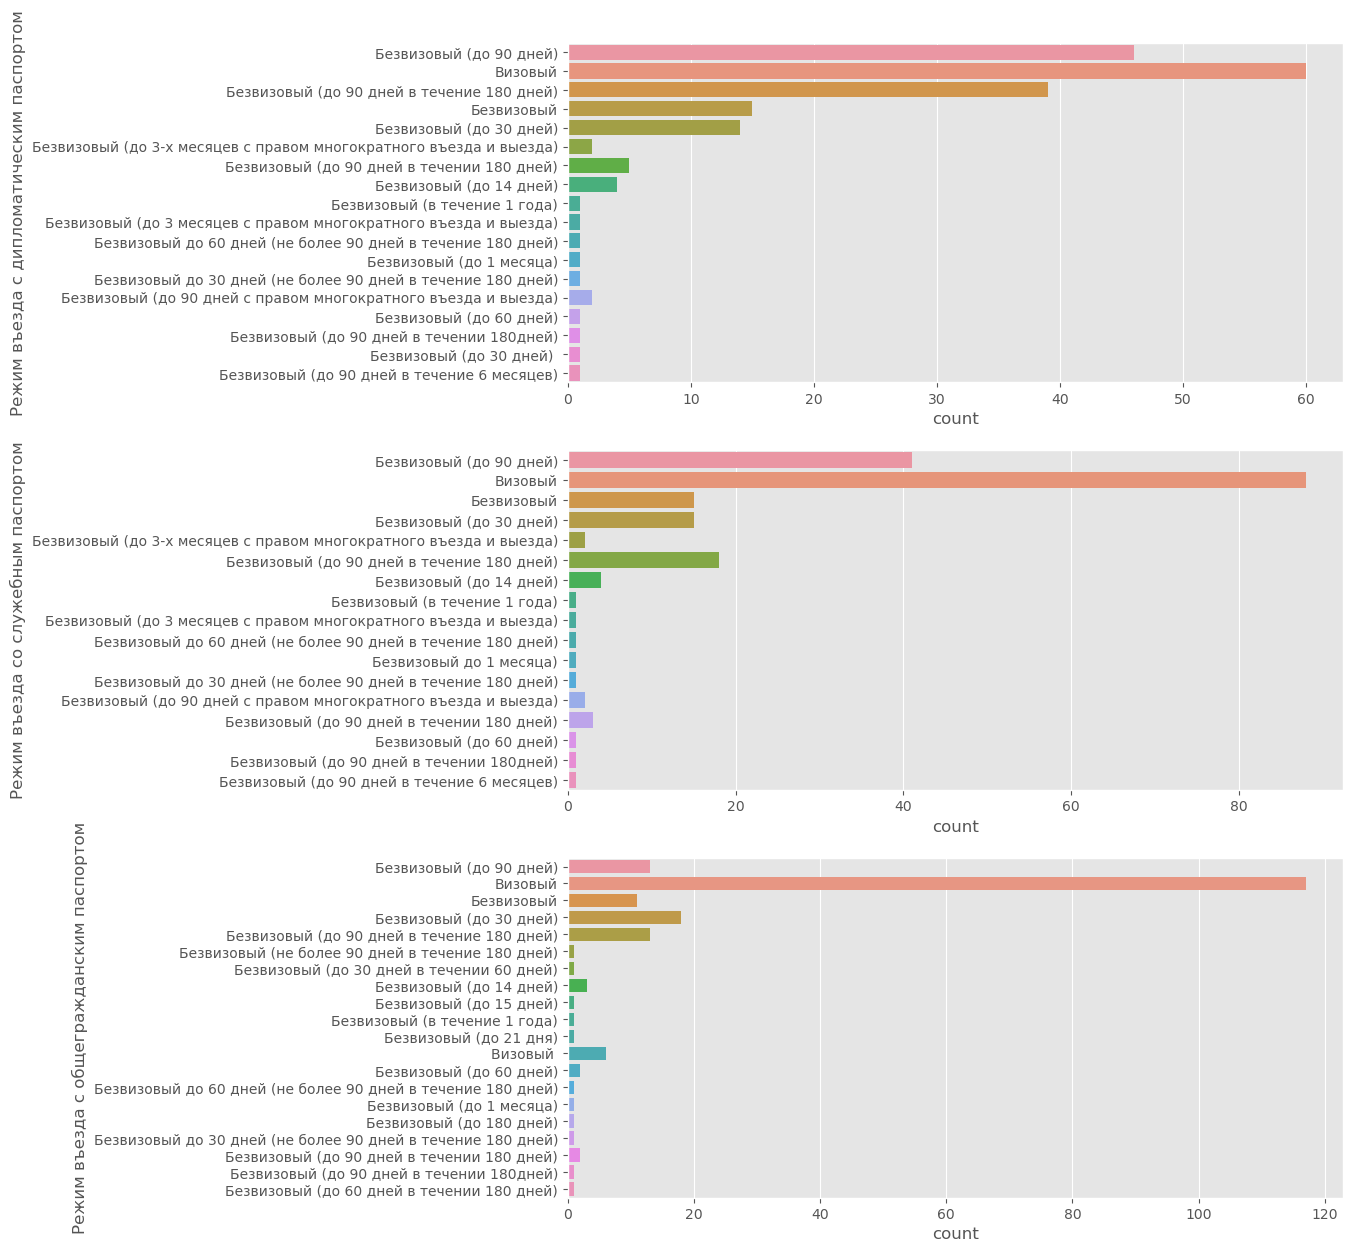

In [6]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

sns.countplot(data=df, y='Режим въезда с дипломатическим паспортом', orient='v', ax=ax[0])
sns.countplot(data=df, y='Режим въезда со служебным паспортом', orient='v', ax=ax[1])
sns.countplot(data=df, y='Режим въезда с общегражданским паспортом', orient='v', ax=ax[2])

In [7]:
df.columns

Index(['№', 'Перечень стран', 'Режим въезда с дипломатическим паспортом',
       'Режим въезда со служебным паспортом',
       'Режим въезда с общегражданским паспортом'],
      dtype='object')

<AxesSubplot:title={'center':'Режим въезда со служебным паспортом'}, xlabel='Перечень стран'>

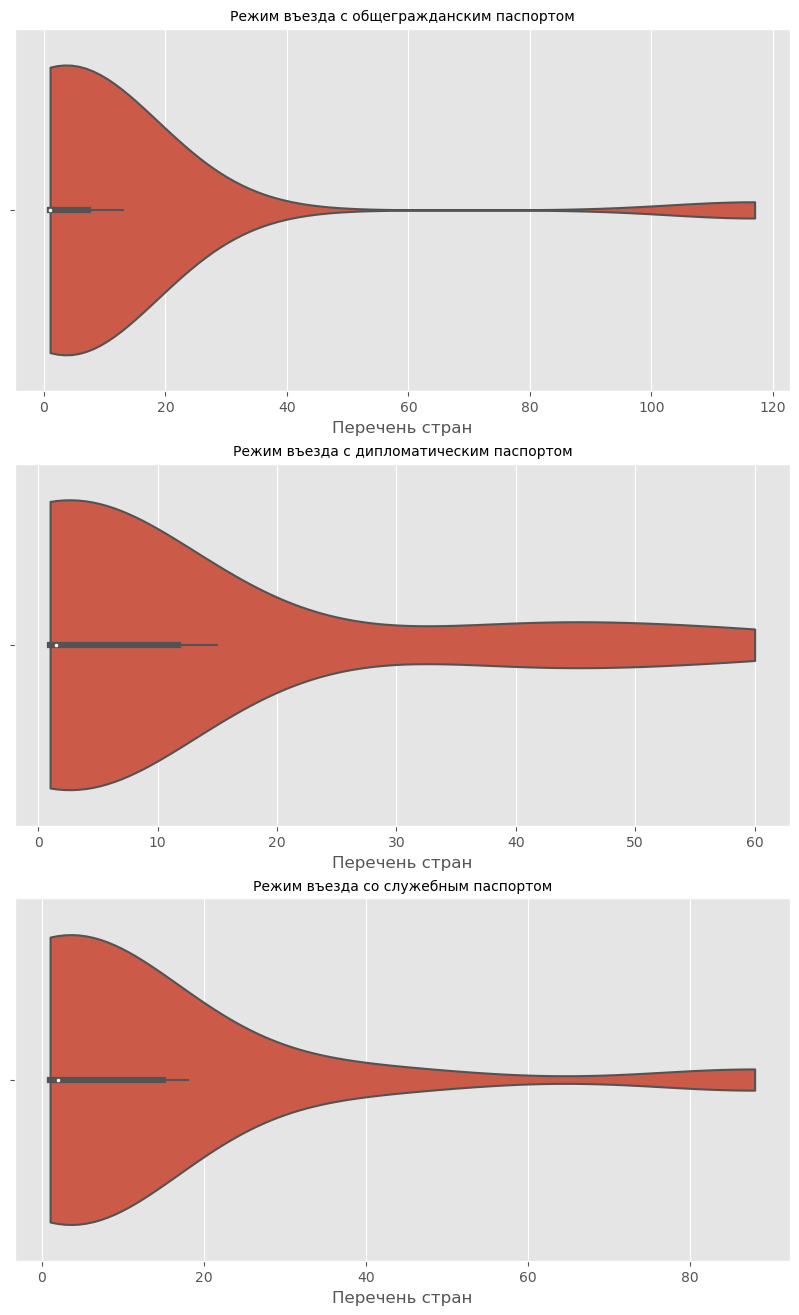

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(10, 16))

tmp = df.groupby(by=['Режим въезда с общегражданским паспортом']).count().reset_index()
ax[0].set_title('Режим въезда с общегражданским паспортом', fontsize=10)
sns.violinplot(data=tmp, x="Перечень стран", cut=0, ax=ax[0])


tmp = df.groupby(by=['Режим въезда с дипломатическим паспортом']).count().reset_index()
ax[1].set_title('Режим въезда с дипломатическим паспортом', fontsize=10)
sns.violinplot(data=tmp, x="Перечень стран", cut=0, ax=ax[1])

tmp = df.groupby(by=['Режим въезда со служебным паспортом']).count().reset_index()
ax[2].set_title('Режим въезда со служебным паспортом', fontsize=10)
sns.violinplot(data=tmp, x="Перечень стран", cut=0, ax=ax[2])

# Часть 3

In [9]:
df = pd.read_csv('Data/flight delays.csv', encoding='cp1251', sep=';').dropna().copy()
df

,Наименование Авиакомпании,Общее количество рейсов выполненых ВСЕГО,Общее количество рейсов Задержанных ИТОГО,Общее количество рейсов Задержанных ПРОЦЕНТ,Количество рейсов задержанных более двух часов ВСЕГО,Количество рейсов задержанных более двух часов РАСП,Количество рейсов задержанных более двух часов В/р ВНУТР,Количество рейсов задержанных более трех часов ВСЕГО,Количество рейсов задержанных более трех часов РАСП,Количество рейсов задержанных более трех часов В/р ВНУТР,Количество рейсов задержанных более четырех часов ВСЕГО,Количество рейсов задержанных более четырех часов РАСП,Количество рейсов задержанных более четырех часов В/р ВНУТР,Количество рейсов задержанных более пяти часов ВСЕГО,Количество рейсов задержанных более пяти часов РАСП,Количество рейсов задержанных более пяти часов В/р ВНУТР,Количество рейсов задержанных более шести часов ВСЕГО,Количество рейсов задержанных более шести часов РАСП,Количество рейсов задержанных более шести часов В/р ВНУТР
0,АВРОРА авиакомпания (АО),1767.0,57.0,"3,23",17.0,15.0,2.0,8.0,7.0,1.0,7.0,6.0,1.0,8.0,8.0,0.0,17.0,16.0,1.0
1,АЗУР ЭЙР,57.0,4.0,"7,02",1.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,АЙ ФЛАЙ,5.0,1.0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,АЛРОСА авиакомпания,658.0,54.0,"8,21",20.0,8.0,12.0,17.0,11.0,6.0,7.0,4.0,3.0,2.0,2.0,0.0,8.0,4.0,4.0
4,АНГАРА авиакомпания,833.0,37.0,"4,44",17.0,11.0,6.0,13.0,8.0,5.0,3.0,1.0,2.0,0.0,0.0,0.0,4.0,3.0,1.0
5,АЭРОФЛОТ-РОССИЙСКИЕ АВИАЛИНИИ,18404.0,328.0,"1,78",161.0,159.0,2.0,71.0,71.0,0.0,32.0,32.0,0.0,18.0,18.0,0.0,46.0,43.0,3.0
6,ВИМ-АВИА авиакомпания,800.0,90.0,"11,25",22.0,22.0,0.0,30.0,29.0,1.0,5.0,5.0,0.0,1.0,1.0,0.0,32.0,31.0,1.0
7,ГАЗПРОМ АВИА авиапредприятие,533.0,30.0,"5,63",13.0,0.0,13.0,6.0,0.0,6.0,4.0,0.0,4.0,4.0,0.0,4.0,3.0,0.0,3.0
8,ГЛОБУС (ООО) а/к,2312.0,54.0,"2,34",16.0,16.0,0.0,11.0,11.0,0.0,6.0,6.0,0.0,4.0,4.0,0.0,17.0,17.0,0.0
9,ИЖАВИА а/к,305.0,9.0,"2,95",3.0,2.0,1.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0


In [10]:
top_10 = df.sort_values(by='Общее количество рейсов выполненых ВСЕГО', ascending=False)[:10].copy()
top_10

,Наименование Авиакомпании,Общее количество рейсов выполненых ВСЕГО,Общее количество рейсов Задержанных ИТОГО,Общее количество рейсов Задержанных ПРОЦЕНТ,Количество рейсов задержанных более двух часов ВСЕГО,Количество рейсов задержанных более двух часов РАСП,Количество рейсов задержанных более двух часов В/р ВНУТР,Количество рейсов задержанных более трех часов ВСЕГО,Количество рейсов задержанных более трех часов РАСП,Количество рейсов задержанных более трех часов В/р ВНУТР,Количество рейсов задержанных более четырех часов ВСЕГО,Количество рейсов задержанных более четырех часов РАСП,Количество рейсов задержанных более четырех часов В/р ВНУТР,Количество рейсов задержанных более пяти часов ВСЕГО,Количество рейсов задержанных более пяти часов РАСП,Количество рейсов задержанных более пяти часов В/р ВНУТР,Количество рейсов задержанных более шести часов ВСЕГО,Количество рейсов задержанных более шести часов РАСП,Количество рейсов задержанных более шести часов В/р ВНУТР
5,АЭРОФЛОТ-РОССИЙСКИЕ АВИАЛИНИИ,18404.0,328.0,"1,78",161.0,159.0,2.0,71.0,71.0,0.0,32.0,32.0,0.0,18.0,18.0,0.0,46.0,43.0,3.0
28,ЮТЭЙР авиакомпания,6436.0,133.0,"2,07",52.0,18.0,34.0,18.0,3.0,15.0,13.0,5.0,8.0,11.0,2.0,9.0,39.0,12.0,27.0
25,СИБИРЬ авиакомпания,5476.0,70.0,"1,28",15.0,15.0,0.0,11.0,11.0,0.0,8.0,8.0,0.0,7.0,7.0,0.0,29.0,29.0,0.0
19,РОССИЯ авиакомпания,5228.0,81.0,"1,55",24.0,24.0,0.0,10.0,10.0,0.0,4.0,4.0,0.0,5.0,5.0,0.0,38.0,38.0,0.0
26,УРАЛЬСКИЕ АВИАЛИНИИ авиакомпания,3734.0,295.0,"7,9",105.0,102.0,3.0,63.0,61.0,2.0,31.0,30.0,1.0,20.0,20.0,0.0,76.0,76.0,0.0
8,ГЛОБУС (ООО) а/к,2312.0,54.0,"2,34",16.0,16.0,0.0,11.0,11.0,0.0,6.0,6.0,0.0,4.0,4.0,0.0,17.0,17.0,0.0
17,ПОБЕДА авиакомпания (ООО),1882.0,30.0,"1,59",15.0,5.0,10.0,3.0,0.0,3.0,3.0,0.0,3.0,1.0,0.0,1.0,8.0,5.0,3.0
0,АВРОРА авиакомпания (АО),1767.0,57.0,"3,23",17.0,15.0,2.0,8.0,7.0,1.0,7.0,6.0,1.0,8.0,8.0,0.0,17.0,16.0,1.0
21,РУСЛАЙН авиационная компания,1677.0,109.0,"6,5",34.0,29.0,5.0,18.0,16.0,2.0,18.0,17.0,1.0,12.0,12.0,0.0,27.0,27.0,0.0
30,ЯМАЛ авиационная трансп. компания,1442.0,76.0,"5,27",23.0,2.0,21.0,13.0,0.0,13.0,8.0,0.0,8.0,10.0,0.0,10.0,22.0,5.0,17.0


<AxesSubplot:xlabel='Общее количество рейсов Задержанных ИТОГО', ylabel='Наименование Авиакомпании'>

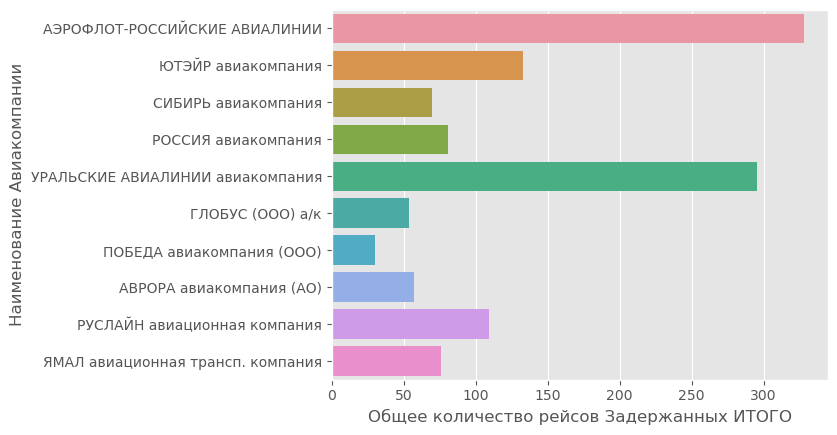

In [11]:
sns.barplot(data=top_10, y='Наименование Авиакомпании', x='Общее количество рейсов Задержанных ИТОГО', orient='h')

In [12]:
fig = px.scatter_3d(df, x='Количество рейсов задержанных более двух часов ВСЕГО', y='Общее количество рейсов Задержанных ИТОГО', z='Общее количество рейсов выполненых ВСЕГО',
                  width=800, height=800)
fig.show()

<AxesSubplot:xlabel='Количество рейсов задержанных более шести часов ВСЕГО', ylabel='Общее количество рейсов выполненых ВСЕГО'>

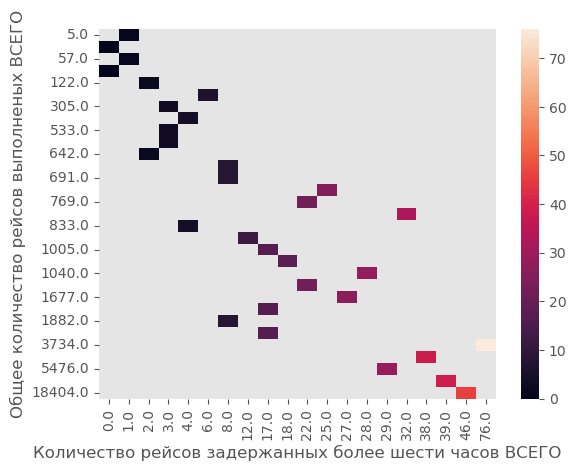

In [13]:
tmp = df.groupby(['Общее количество рейсов выполненых ВСЕГО', 'Количество рейсов задержанных более шести часов ВСЕГО']).sum().reset_index().pivot(index='Общее количество рейсов выполненых ВСЕГО', columns='Количество рейсов задержанных более шести часов ВСЕГО', values='Количество рейсов задержанных более шести часов ВСЕГО')
sns.heatmap(data=tmp)

<AxesSubplot:>

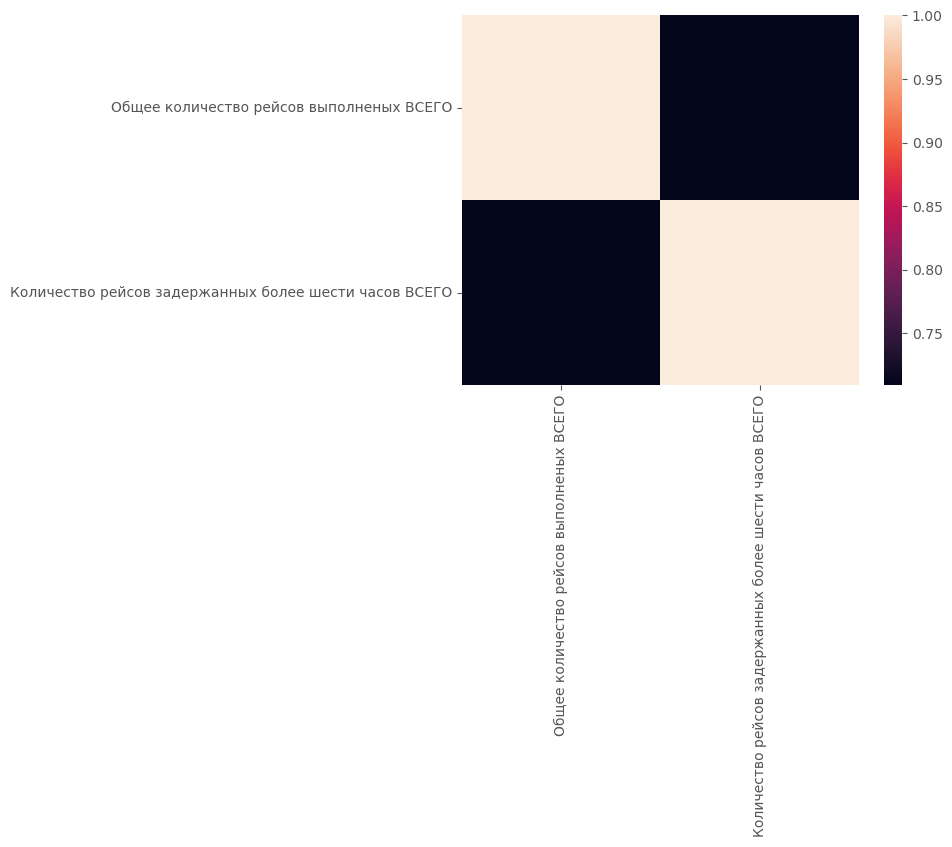

In [14]:
sns.heatmap(df[:20][['Общее количество рейсов выполненых ВСЕГО', 'Количество рейсов задержанных более шести часов ВСЕГО']].corr())